# Workout Classification - Tensorflow



## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Download Data

In [ ]:
# Upload first your data before execute these code below
path_workout = "/tmp/datasetX.csv"; # change this
path_other = "/tmp/datasetX-2.csv"; # change this
name_class = "curls" # change this
# change resolution if you using video with different resolution
resolution = { 
    "width": 640,
    "height": 360
}

In [ ]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [ ]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,171.980516,76.599923,174.806825,73.567004,168.439795,73.338656,178.589235,76.559538,164.288185,76.346506,...,160.312398,141.689070,177.740820,183.347934,159.389573,183.382920,184.569995,217.024629,150.990967,215.905404
1,171.955646,76.762703,174.968736,74.066161,168.881483,73.503672,179.079893,76.777635,164.972375,76.078064,...,161.055068,140.601848,178.596952,183.912638,160.641799,183.789801,185.549670,219.276111,151.242878,215.583364
2,171.725781,75.933177,175.274619,73.263603,168.945025,73.188417,179.846746,76.615132,166.071675,76.241626,...,161.656598,138.895210,176.999620,182.963716,159.702102,182.911267,185.373196,220.722751,150.417793,218.432271
3,171.470515,76.875530,174.914362,74.482879,169.104177,73.947743,179.115605,76.959362,165.440296,76.041604,...,161.696990,139.032883,175.752790,183.285835,159.166393,183.276674,184.815654,220.172921,151.161911,219.221434
4,171.267591,77.037317,174.671597,74.467026,168.821163,74.022737,179.027711,76.908378,165.307760,76.269237,...,161.412899,139.368185,175.221441,183.390390,158.648981,183.840041,184.821553,219.500805,150.860089,219.216494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,171.546853,75.898335,174.689982,73.242245,167.821160,73.460520,177.769050,75.948992,163.144913,77.020902,...,160.059325,139.153344,177.376480,182.160980,159.984716,181.981425,184.549908,219.256288,150.607039,217.478274
131,171.500724,75.999082,174.644353,73.332716,167.819301,73.533202,177.736041,76.026346,163.163141,77.055972,...,160.060467,139.126375,177.400588,182.156947,160.009462,181.980483,184.543498,219.247474,150.627596,217.447318
132,171.533663,75.929384,174.676265,73.267517,167.822498,73.476237,177.768665,75.944336,163.153661,76.999629,...,160.081226,139.173583,177.411751,182.150675,160.065904,181.984608,184.541797,219.235115,150.699176,217.272910
133,171.481954,75.995215,174.630116,73.339957,167.810913,73.532611,177.740130,76.062934,163.161622,77.083343,...,160.065584,139.136909,177.380089,182.139505,159.964485,182.038367,184.547238,219.279751,150.631931,217.438854


In [ ]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,378.162812,133.697748,382.611916,130.174581,376.661605,127.964534,389.016749,124.115379,366.646139,124.604502,...,314.927356,179.178430,356.988896,251.960273,321.809225,245.134542,339.068741,288.119522,301.582299,283.274199
1,377.810749,170.937018,381.918932,157.405005,372.638852,161.748918,376.078803,143.320401,358.117798,149.981018,...,284.043833,201.767984,366.816017,218.628263,313.957106,244.687839,365.398676,278.483067,330.414031,276.955767
2,377.619446,171.768986,381.601486,158.220659,371.756236,162.576243,374.796913,144.112416,356.963787,150.792401,...,282.569525,202.571783,368.015912,217.801610,312.830853,244.495105,366.845172,277.759470,331.876734,276.290567
3,365.337572,156.455117,371.944292,153.675019,363.397719,149.327594,378.593037,145.893353,351.453681,137.742272,...,304.982392,212.306597,345.402276,293.912188,280.292170,281.601748,338.693938,329.797204,284.966097,329.642319
4,264.292416,83.783504,265.504885,81.584498,261.166072,81.713324,291.457379,63.761417,258.914323,84.364093,...,322.131567,189.246739,353.226663,208.678820,311.160951,210.139008,360.496218,213.170110,320.870001,214.821347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12581,168.384975,213.312384,162.943293,208.344672,165.177444,217.862844,164.200056,195.313275,171.822527,219.567368,...,301.002386,197.125279,342.284142,104.323504,380.638841,203.875643,390.123631,58.575576,448.323029,190.903355
12582,190.010143,200.876383,167.259611,205.920818,173.963340,211.981725,166.841496,191.789120,174.712341,215.697205,...,294.684201,204.290672,357.933734,139.336433,373.735700,205.022631,395.028767,55.875163,446.438252,193.305897
12583,181.292674,190.487473,166.917443,192.526121,171.662146,199.242556,166.490358,184.339181,171.815092,207.674870,...,290.868603,199.770050,345.713141,109.374022,373.401445,197.173443,393.878543,54.899236,435.818502,193.181815
12584,179.681541,191.045848,169.380239,173.348613,170.491833,191.947441,168.781517,188.078496,165.782806,201.058343,...,292.683972,190.753671,341.325752,106.077934,290.326156,228.826644,394.692871,55.223203,399.476930,54.965166


**Important**: Check first, the number of data each class is balance or not.

## Data Understanding

TODO: Coming Soon

## Data Exploration

TODO: Coming Soon

## Data Preparation

In [ ]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,171.980516,76.599923,174.806825,73.567004,168.439795,73.338656,178.589235,76.559538,164.288185,76.346506,...,141.689070,177.740820,183.347934,159.389573,183.382920,184.569995,217.024629,150.990967,215.905404,curls
1,171.955646,76.762703,174.968736,74.066161,168.881483,73.503672,179.079893,76.777635,164.972375,76.078064,...,140.601848,178.596952,183.912638,160.641799,183.789801,185.549670,219.276111,151.242878,215.583364,curls
2,171.725781,75.933177,175.274619,73.263603,168.945025,73.188417,179.846746,76.615132,166.071675,76.241626,...,138.895210,176.999620,182.963716,159.702102,182.911267,185.373196,220.722751,150.417793,218.432271,curls
3,171.470515,76.875530,174.914362,74.482879,169.104177,73.947743,179.115605,76.959362,165.440296,76.041604,...,139.032883,175.752790,183.285835,159.166393,183.276674,184.815654,220.172921,151.161911,219.221434,curls
4,171.267591,77.037317,174.671597,74.467026,168.821163,74.022737,179.027711,76.908378,165.307760,76.269237,...,139.368185,175.221441,183.390390,158.648981,183.840041,184.821553,219.500805,150.860089,219.216494,curls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,171.546853,75.898335,174.689982,73.242245,167.821160,73.460520,177.769050,75.948992,163.144913,77.020902,...,139.153344,177.376480,182.160980,159.984716,181.981425,184.549908,219.256288,150.607039,217.478274,curls
131,171.500724,75.999082,174.644353,73.332716,167.819301,73.533202,177.736041,76.026346,163.163141,77.055972,...,139.126375,177.400588,182.156947,160.009462,181.980483,184.543498,219.247474,150.627596,217.447318,curls
132,171.533663,75.929384,174.676265,73.267517,167.822498,73.476237,177.768665,75.944336,163.153661,76.999629,...,139.173583,177.411751,182.150675,160.065904,181.984608,184.541797,219.235115,150.699176,217.272910,curls
133,171.481954,75.995215,174.630116,73.339957,167.810913,73.532611,177.740130,76.062934,163.161622,77.083343,...,139.136909,177.380089,182.139505,159.964485,182.038367,184.547238,219.279751,150.631931,217.438854,curls


In [ ]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,207.622301,207.636083,207.985657,207.311945,208.730059,206.718223,209.777346,217.754931,208.870325,213.309420,...,213.894420,156.498998,212.912568,160.785905,210.731246,156.041778,208.410537,156.306461,206.763285,other
1,207.195655,198.306512,208.898683,199.928583,208.373356,197.982697,212.573301,213.216213,208.573675,204.469677,...,219.098715,173.779582,219.167084,160.844220,209.189294,139.096933,190.306516,138.912430,189.080430,other
2,203.217752,198.215619,206.313639,197.792138,203.837243,196.622079,211.043530,203.640982,204.491297,199.720339,...,220.839567,158.288190,195.950328,159.886540,194.911494,130.587661,191.544675,130.906559,190.836020,other
3,199.114240,200.511973,201.822529,200.234433,198.652835,199.141829,207.111321,206.784980,197.974803,202.527012,...,221.111606,166.248351,183.582434,137.365459,186.273561,140.312753,218.543183,136.764867,217.971376,other
4,198.936937,200.194102,201.420144,200.312784,198.596806,199.073337,206.508264,207.134484,198.560443,201.758796,...,220.761155,169.757364,183.172640,135.860937,191.073498,144.904817,213.579659,139.977205,214.377619,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,204.510738,201.221409,207.277232,200.727702,203.732831,199.990112,211.329148,204.722052,202.355489,203.265005,...,220.686891,171.850886,187.469250,146.715434,183.355635,148.750772,216.217023,127.386522,214.995651,other
93,204.634607,201.647386,207.135837,201.098147,204.131188,199.342705,211.579436,206.765859,202.306907,203.001775,...,221.830047,172.497797,189.839108,148.848225,181.677412,142.186460,213.461407,130.837175,212.041281,other
94,204.159341,198.233240,206.954625,198.395695,205.229825,197.136888,212.910802,205.895021,207.137520,201.115250,...,217.001352,168.072008,195.620585,152.291556,181.537916,139.589742,218.983200,139.916312,216.398735,other
95,199.600632,197.691045,202.433086,197.456977,201.142967,196.759458,208.155535,203.910689,203.500241,200.610914,...,219.843040,166.605172,196.787697,157.033537,180.602110,139.315702,217.304018,139.711279,202.035249,other


In [ ]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,171.980516,76.599923,174.806825,73.567004,168.439795,73.338656,178.589235,76.559538,164.288185,76.346506,...,141.689070,177.740820,183.347934,159.389573,183.382920,184.569995,217.024629,150.990967,215.905404,curls
1,171.955646,76.762703,174.968736,74.066161,168.881483,73.503672,179.079893,76.777635,164.972375,76.078064,...,140.601848,178.596952,183.912638,160.641799,183.789801,185.549670,219.276111,151.242878,215.583364,curls
2,171.725781,75.933177,175.274619,73.263603,168.945025,73.188417,179.846746,76.615132,166.071675,76.241626,...,138.895210,176.999620,182.963716,159.702102,182.911267,185.373196,220.722751,150.417793,218.432271,curls
3,171.470515,76.875530,174.914362,74.482879,169.104177,73.947743,179.115605,76.959362,165.440296,76.041604,...,139.032883,175.752790,183.285835,159.166393,183.276674,184.815654,220.172921,151.161911,219.221434,curls
4,171.267591,77.037317,174.671597,74.467026,168.821163,74.022737,179.027711,76.908378,165.307760,76.269237,...,139.368185,175.221441,183.390390,158.648981,183.840041,184.821553,219.500805,150.860089,219.216494,curls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,204.510738,201.221409,207.277232,200.727702,203.732831,199.990112,211.329148,204.722052,202.355489,203.265005,...,220.686891,171.850886,187.469250,146.715434,183.355635,148.750772,216.217023,127.386522,214.995651,other
228,204.634607,201.647386,207.135837,201.098147,204.131188,199.342705,211.579436,206.765859,202.306907,203.001775,...,221.830047,172.497797,189.839108,148.848225,181.677412,142.186460,213.461407,130.837175,212.041281,other
229,204.159341,198.233240,206.954625,198.395695,205.229825,197.136888,212.910802,205.895021,207.137520,201.115250,...,217.001352,168.072008,195.620585,152.291556,181.537916,139.589742,218.983200,139.916312,216.398735,other
230,199.600632,197.691045,202.433086,197.456977,201.142967,196.759458,208.155535,203.910689,203.500241,200.610914,...,219.843040,166.605172,196.787697,157.033537,180.602110,139.315702,217.304018,139.711279,202.035249,other


In [ ]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,305.326171,99.284166,311.477313,95.029238,308.882340,94.930555,322.441368,96.030014,318.434073,95.600313,...,318.655484,179.042677,321.873641,239.629819,317.454948,240.838745,328.763399,299.379523,322.553892,295.133221
1,307.862633,102.211906,310.808610,97.718169,309.369405,97.346600,322.540169,98.304947,320.326035,97.176355,...,318.855690,177.613139,323.146159,238.456764,317.356793,239.737744,328.949442,302.675909,322.055196,296.800207
2,307.021964,101.520982,311.474387,97.609717,309.797782,97.513883,323.644180,98.194328,320.237658,97.431400,...,318.779011,177.669479,322.878943,239.322864,318.198876,240.103689,329.061006,302.394245,323.263015,297.971772
3,306.442038,102.054308,310.750023,97.963264,309.183285,97.789595,322.554781,98.831208,319.804942,97.690400,...,318.938340,177.176504,322.737190,238.993900,318.708439,239.758874,328.563102,302.481385,322.608019,297.376547
4,306.819827,101.688490,310.997308,97.691148,309.595173,97.674247,322.513205,98.276187,320.050013,97.524863,...,319.232812,177.140008,322.392638,239.344105,318.322140,240.162063,328.997770,302.504881,323.487171,297.937783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25212,168.384975,213.312384,162.943293,208.344672,165.177444,217.862844,164.200056,195.313275,171.822527,219.567368,...,301.002386,197.125279,342.284142,104.323504,380.638841,203.875643,390.123631,58.575576,448.323029,190.903355
25213,190.010143,200.876383,167.259611,205.920818,173.963340,211.981725,166.841496,191.789120,174.712341,215.697205,...,294.684201,204.290672,357.933734,139.336433,373.735700,205.022631,395.028767,55.875163,446.438252,193.305897
25214,181.292674,190.487473,166.917443,192.526121,171.662146,199.242556,166.490358,184.339181,171.815092,207.674870,...,290.868603,199.770050,345.713141,109.374022,373.401445,197.173443,393.878543,54.899236,435.818502,193.181815
25215,179.681541,191.045848,169.380239,173.348613,170.491833,191.947441,168.781517,188.078496,165.782806,201.058343,...,292.683972,190.753671,341.325752,106.077934,290.326156,228.826644,394.692871,55.223203,399.476930,54.965166


In [ ]:
y

0      curls
1      curls
2      curls
3      curls
4      curls
       ...  
227    other
228    other
229    other
230    other
231    other
Name: class, Length: 232, dtype: object

In [ ]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [ ]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.268720,0.212778,0.273136,0.204353,0.263187,0.203718,0.279046,0.212665,0.256700,0.212074,...,0.250488,0.393581,0.277720,0.509300,0.249046,0.509397,0.288391,0.602846,0.235923,0.599737
1,0.268681,0.213230,0.273389,0.205739,0.263877,0.204177,0.279812,0.213271,0.257769,0.211328,...,0.251649,0.390561,0.279058,0.510868,0.251003,0.510527,0.289921,0.609100,0.236317,0.598843
2,0.268322,0.210925,0.273867,0.203510,0.263977,0.203301,0.281011,0.212820,0.259487,0.211782,...,0.252588,0.385820,0.276562,0.508233,0.249535,0.508087,0.289646,0.613119,0.235028,0.606756
3,0.267923,0.213543,0.273304,0.206897,0.264225,0.205410,0.279868,0.213776,0.258500,0.211227,...,0.252652,0.386202,0.274614,0.509127,0.248697,0.509102,0.288774,0.611591,0.236190,0.608948
4,0.267606,0.213993,0.272924,0.206853,0.263783,0.205619,0.279731,0.213634,0.258293,0.211859,...,0.252208,0.387134,0.273784,0.509418,0.247889,0.510667,0.288784,0.609724,0.235719,0.608935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0.319548,0.558948,0.323871,0.557577,0.318333,0.555528,0.330202,0.568672,0.316180,0.564625,...,0.253239,0.613019,0.268517,0.520748,0.229243,0.509321,0.232423,0.600603,0.199041,0.597210
228,0.319742,0.560132,0.323650,0.558606,0.318955,0.553730,0.330593,0.574350,0.316105,0.563894,...,0.250275,0.616195,0.269528,0.527331,0.232575,0.504659,0.222166,0.592948,0.204433,0.589004
229,0.318999,0.550648,0.323367,0.551099,0.320672,0.547602,0.332673,0.571931,0.323652,0.558653,...,0.260990,0.602782,0.262613,0.543391,0.237956,0.504272,0.218109,0.608287,0.218619,0.601108
230,0.311876,0.549142,0.316302,0.548492,0.314286,0.546554,0.325243,0.566419,0.317969,0.557253,...,0.260463,0.610675,0.260321,0.546632,0.245365,0.501673,0.217681,0.603622,0.218299,0.561209


### One Hot Encoding

In [ ]:
y = pd.get_dummies(y).values
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1,

### Split Dataset

In [ ]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 208
The number of test data X is: 24
The number of train data y is : 208
The number of test daya y is : 24
The total dataset is : 232


## Modelling

In [ ]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2240      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 3

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [ ]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [ ]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=200)

Epoch 1/200
4/4 [==============================] - 2s 129ms/step - loss: 0.7327 - accuracy: 0.4663 - val_loss: 0.6977 - val_accuracy: 0.3333
Epoch 2/200
4/4 [==============================] - 0s 24ms/step - loss: 0.6960 - accuracy: 0.5673 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/200
4/4 [==============================] - 0s 18ms/step - loss: 0.7088 - accuracy: 0.4952 - val_loss: 0.6832 - val_accuracy: 1.0000
Epoch 4/200
4/4 [==============================] - 0s 25ms/step - loss: 0.6843 - accuracy: 0.5096 - val_loss: 0.6690 - val_accuracy: 1.0000
Epoch 5/200
4/4 [==============================] - 0s 29ms/step - loss: 0.6893 - accuracy: 0.5385 - val_loss: 0.6553 - val_accuracy: 1.0000
Epoch 6/200
4/4 [==============================] - 0s 27ms/step - loss: 0.6728 - accuracy: 0.6154 - val_loss: 0.6450 - val_accuracy: 0.6667
Epoch 7/200
4/4 [==============================] - 0s 26ms/step - loss: 0.6686 - accuracy: 0.6058 - val_loss: 0.6345 - val_accuracy: 0.6667
Epoch 8/200
4/4 [==

## Visualization Acc & Loss

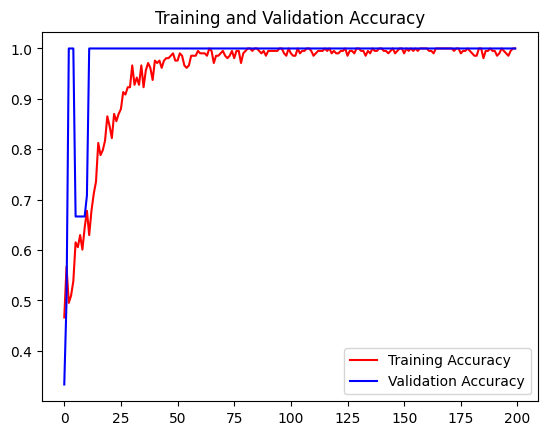

<Figure size 640x480 with 0 Axes>

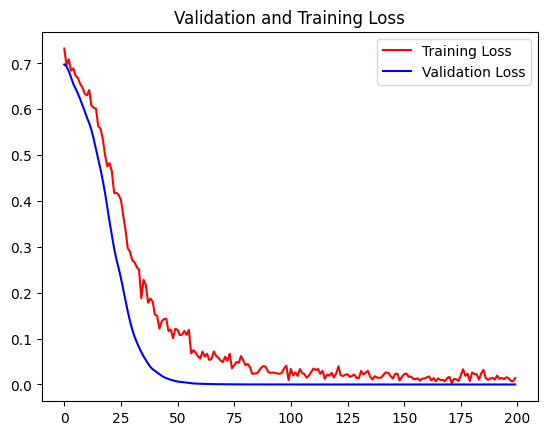

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 9.703229331137209e-09
Test accuracy: 1.0


## Test Prediction

In [ ]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
42,0.271426,0.212378,0.276326,0.205417,0.266216,0.204399,0.280221,0.213552,0.25863,0.21353,...,0.252219,0.388112,0.277362,0.507222,0.249461,0.506615,0.28815,0.609753,0.236682,0.60609


In [ ]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : curls


In [ ]:
df_data['class'].unique()

array(['curls', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- squat --> Index (1)

In [ ]:
predict_sample = model.predict(x_sample)

1/1 [==============================] - 0s 326ms/step


In [ ]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
other


## Export Model

In [ ]:
# Download this file for backup
model.save("model.h5")

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━

In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/tfjs_float_model_workout

2023-04-05 16:50:13.377205: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-05 16:50:13.377443: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-05 16:50:13.377477: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [ ]:
!zip -r /content/tfjs_float_model_workout.zip /content/tfjs_float_model_workout

  adding: content/tfjs_float_model_workout/ (stored 0%)
  adding: content/tfjs_float_model_workout/group1-shard1of1.bin (deflated 8%)
  adding: content/tfjs_float_model_workout/model.json (deflated 78%)


Don't forget to download tfjs model (check relatable folder)